In [238]:
# Import modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB


Importamos los datos del csv y mostramos una parte del dataframe

In [239]:
df_train = pd.read_csv('./csv/train.csv')
df_test = pd.read_csv('./csv/test.csv')

In [240]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Mostramos algunos de los datos en gráficas

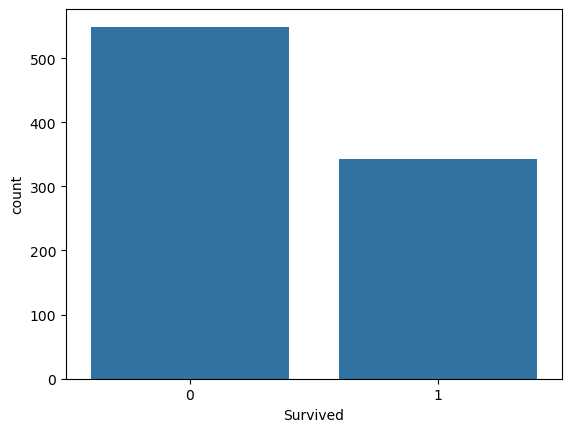

In [242]:
sns.countplot(x='Survived', data=df_train);

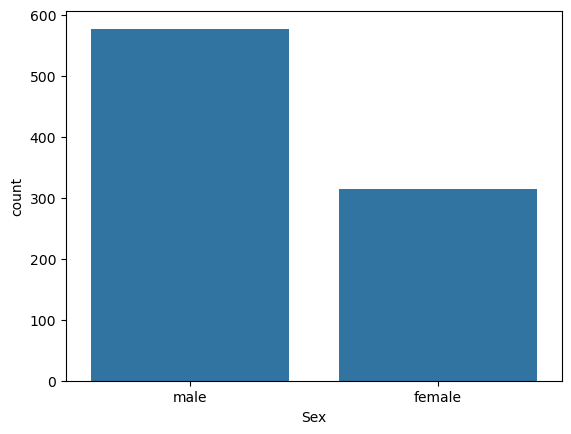

In [243]:
sns.countplot(x='Sex', data=df_train);

Podemos observar que el número de mujeres que sobrevivió es bastante superior al de los hombres(algo más del doble)

In [244]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

Mostramos el porcentaje de mujeres y hombres

In [245]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


El 74%  de ñas mujeres han sobrevivido, mientras que los hombres solo un 19%.

Los pasajeros de primera clase han sobrevivido en mayor cantidad. Al contrario, los pasajeros de tercera clase en su mayoría han fallecido.

Los pasajeros que embarcaron en Southampton han fallecido en mayor cantidad en relaciones a las otras embarcaciones.

Mostramos una gráfica con la relación de datos

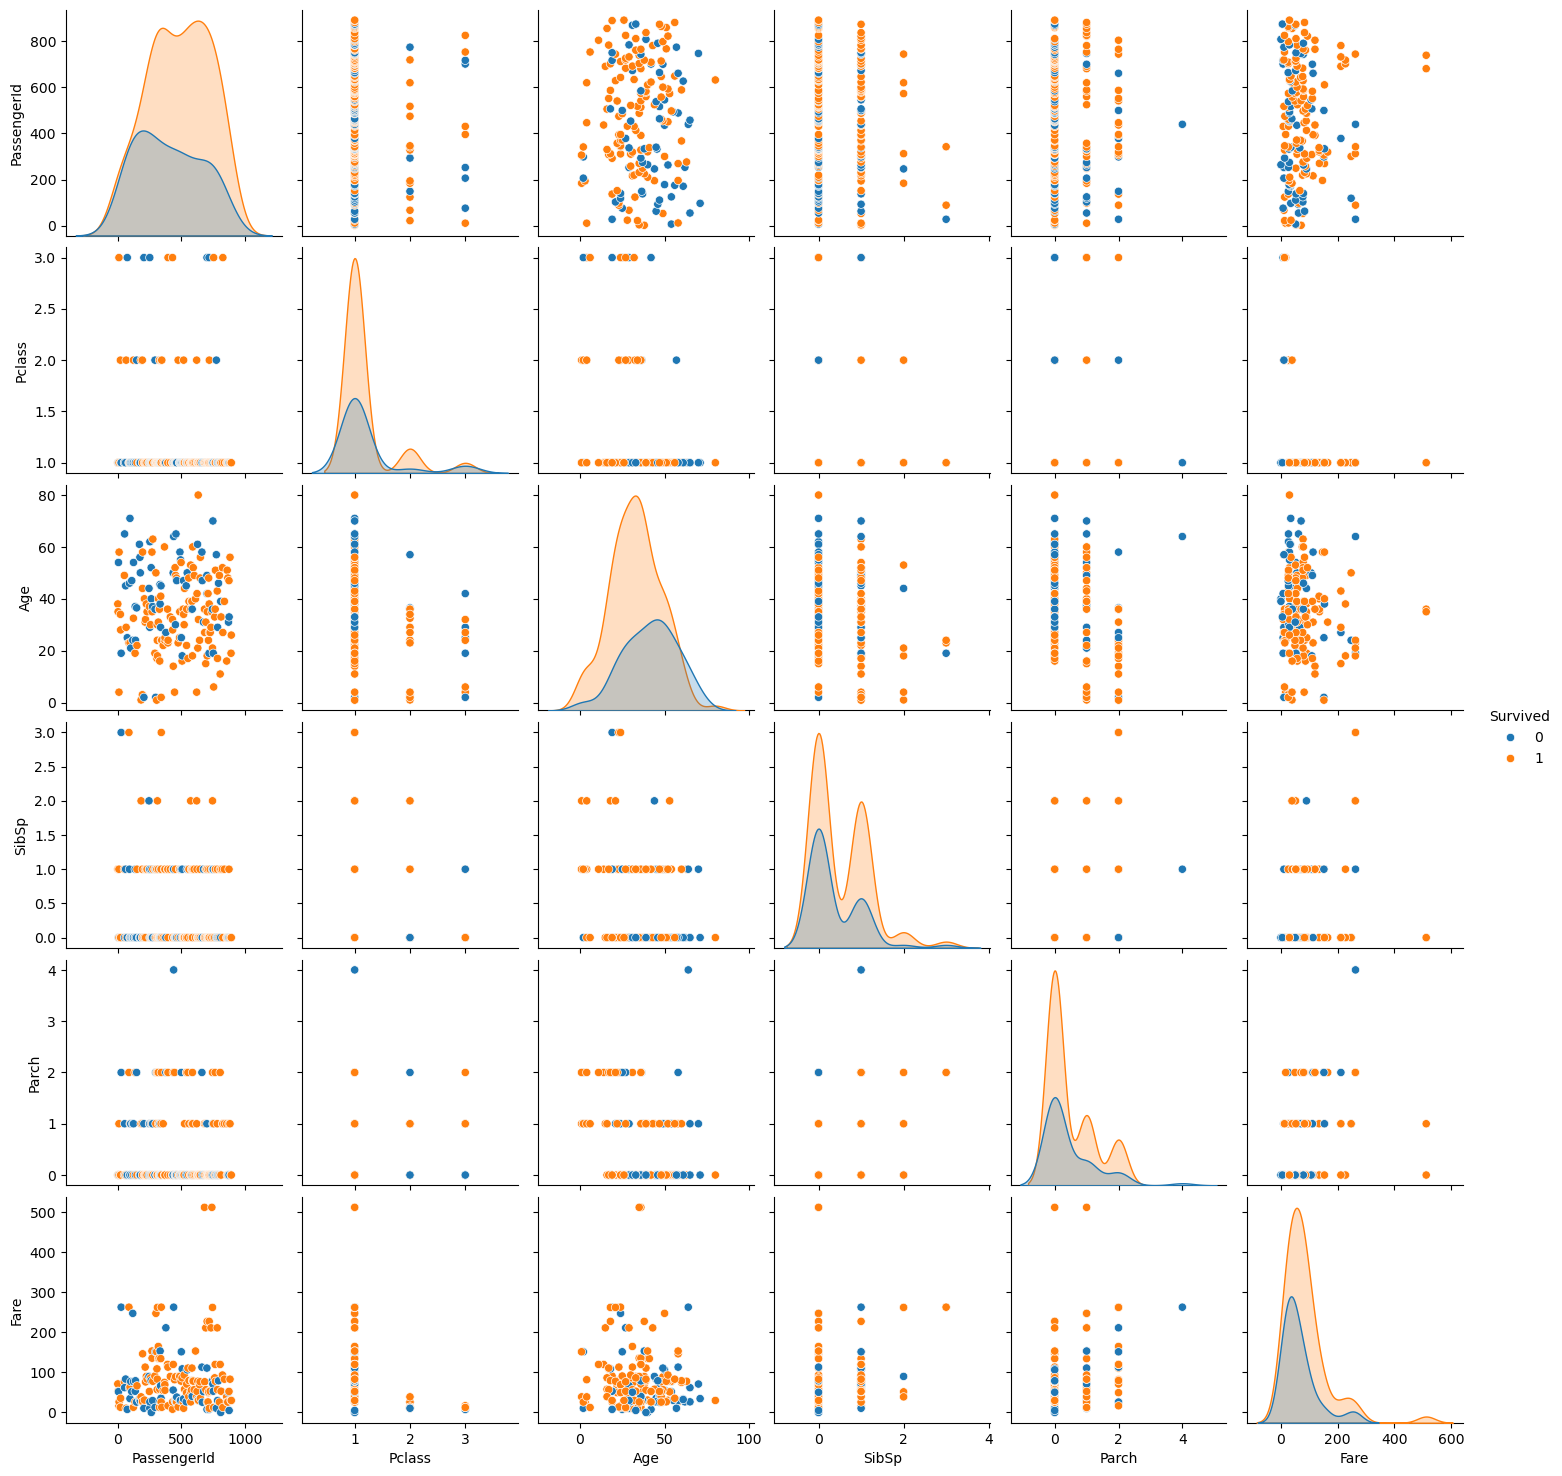

In [246]:
df_train_drop = df_train.dropna()
sns.pairplot(df_train_drop, hue='Survived');

In [247]:
# Gaurdamos la variable objetivo
survived_train = df_train.Survived

# Concatenamos train y test
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [249]:
# Rellenamos los valores nulos
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [250]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True


In [251]:
# Seleccionamos las columnas que vamos a utilizar
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,True,7.2500,22.0,3,1
1,False,71.2833,38.0,1,1
2,False,7.9250,26.0,3,0
3,False,53.1000,35.0,1,1
4,True,8.0500,35.0,3,0


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  1309 non-null   bool   
 1   Fare      1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Pclass    1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
dtypes: bool(1), float64(2), int64(2)
memory usage: 52.4 KB


In [253]:
# Separamos los datos de entrenamiento y test
data_train = data.iloc[:891]
data_test = data.iloc[891:]

In [254]:
# Pasamos los datos a un array para poder entrenar el modelo
X = data_train.values
test = data_test.values
y = survived_train.values

In [255]:
# Instanciamos el modelo
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [256]:
import graphviz 


dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=data_train.columns.values,  
                         class_names=['Not Survived', 'Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render('decision_tree', view=True)

'decision_tree.png'

In [257]:
# Predecimos los valores de test
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred
clf.score(X, y)

0.978675645342312

In [258]:
# Mostramos en un dataframe los resultados de la predicción
df_test[['PassengerId', 'Survived']]

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Otros modelos

Usamos un modelo de regresión logística para ver la diferencia de precisión

In [259]:
# Instanciamos el modelo
logreg = LogisticRegression()

# Entrenamos el modelo
logreg.fit(X, y)

# Predecimos los valores de test
y_pred_logreg = logreg.predict(test)

# Evaluamos el modelo
accuracy = accuracy_score(y, logreg.predict(X))
print(f'Precisión: {accuracy:.2f}')

# Mostramos la matriz de confusión y el reporte de clasificación
print('Matriz de confusión:')
print(confusion_matrix(y, logreg.predict(X)))
print('\nReporte:')
print(classification_report(y, logreg.predict(X)))

Precisión: 0.79
Matriz de confusión:
[[461  88]
 [ 98 244]]

Reporte:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       549
           1       0.73      0.71      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [260]:
# Instanciamos el modelo
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamos el modelo
knn.fit(X, y)

# Predecimos los valores de test
y_pred_knn = knn.predict(test)

# Evaluamos el modelo
accuracy_knn = accuracy_score(y, knn.predict(X))
print(f'Precisión del modelo KNN: {accuracy_knn:.2f}')

# Mostramos la matriz de confusión y el reporte de clasificación
print('Matriz de confusión del modelo KNN:')
print(confusion_matrix(y, knn.predict(X)))
print('\nReporte del modelo KNN:')
print(classification_report(y, knn.predict(X)))

Precisión del modelo KNN: 0.81
Matriz de confusión del modelo KNN:
[[481  68]
 [105 237]]

Reporte del modelo KNN:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       549
           1       0.78      0.69      0.73       342

    accuracy                           0.81       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.81      0.80       891



In [261]:
# Instanciamos el modelo
bernoulli_nb = BernoulliNB()

# Entrenamos el modelo
bernoulli_nb.fit(X, y)

# Predecimos los valores de test
y_pred_bernoulli = bernoulli_nb.predict(test)

# Evaluamos el modelo
accuracy_bernoulli = accuracy_score(y, bernoulli_nb.predict(X))
print(f'Precisión del modelo Bernoulli Naive Bayes: {accuracy_bernoulli:.2f}')

# Mostramos la matriz de confusión y el reporte de clasificación
print('Matriz de confusión del modelo Bernoulli Naive Bayes:')
print(confusion_matrix(y, bernoulli_nb.predict(X)))
print('\nReporte del modelo Bernoulli Naive Bayes:')
print(classification_report(y, bernoulli_nb.predict(X)))

Precisión del modelo Bernoulli Naive Bayes: 0.79
Matriz de confusión del modelo Bernoulli Naive Bayes:
[[468  81]
 [109 233]]

Reporte del modelo Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



In [262]:
# Instanciamos el modelo
gaussian_nb = GaussianNB()

# Entrenamos el modelo
gaussian_nb.fit(X, y)

# Predecimos los valores de test
y_pred_gaussian = gaussian_nb.predict(test)

# Evaluamos el modelo
accuracy_gaussian = accuracy_score(y, gaussian_nb.predict(X))
print(f'Precisión del modelo Gaussian Naive Bayes: {accuracy_gaussian:.2f}')

# Mostramos la matriz de confusión y el reporte de clasificación
print('Matriz de confusión del modelo Gaussian Naive Bayes:')
print(confusion_matrix(y, gaussian_nb.predict(X)))
print('\nReporte del modelo Gaussian Naive Bayes:')
print(classification_report(y, gaussian_nb.predict(X)))

Precisión del modelo Gaussian Naive Bayes: 0.79
Matriz de confusión del modelo Gaussian Naive Bayes:
[[461  88]
 [101 241]]

Reporte del modelo Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       549
           1       0.73      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



#### Utilizando los mismos datos usados para el árbol de decisiones, podemos observar que los resultados obtenidos de los otros modelos son inferiores al obtenido por el árbol de decisiones